In [4]:
import gzip
from collections import defaultdict
import numpy as np
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt

# Mapping summary

In [11]:
for name in ["Ju_Mi", "Ad_Fe", "Ad_Ma"]:
    num1 = 0
    with gzip.open("results/isoseq/polished/%s.hq.fasta.gz" % name, "rt") as f:
        for read in SeqIO.parse(f, "fasta"):
            num1 += 1
    num2 = 0
    num3 = 0
    with open("results/mapping/mapped/%s.stats" % name) as f:
        for line in f:
            if "Total reads:" in line:
                num2 = int(line.strip("\n").split()[-1])
            if "Mapped reads:" in line:
                num3 = int(line.strip("\n").split()[-2])
    num4 = num2 - num3
    ratio = 1 - num4 / num1
    print(name, num1, num2, num3, num4, ratio, sep="\t")

Ju_Mi	163218	166293	166280	13	0.9999203519219694
Ad_Fe	189169	194724	194622	102	0.9994607996024719
Ad_Ma	149716	153617	153588	29	0.9998062999278634


# Soft-clip

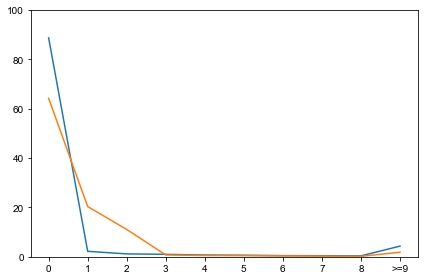

In [20]:
def get_ratios(counter, max_clip):
    ys = np.array([counter[clip] for clip in np.arange(max_clip)])
    ys[-1] = sum(counter.values()) - sum(ys[:-1])
    ys = ys * 100 / sum(ys)
    return ys

dat = pd.read_csv("results/mapping/stat_clip/Ad_Ma.mp2.tsv", sep="\t")
counter1 = defaultdict(int)
counter2 = defaultdict(int)
for clip1, clip2, count in dat[["HeadClip", "TailClip", "Count"]].values:
    counter1[clip1] += count
    counter2[clip2] += count

max_clip = 10
ys1 = get_ratios(counter1, max_clip)
ys2 = get_ratios(counter2, max_clip)
xs = np.arange(len(ys1))
ticks = list(map(str, xs))
ticks[-1] = ">=%s" % ticks[-1]
plt.figure()
plt.plot(xs, ys1)
plt.plot(xs, ys2)
plt.xticks(xs, ticks)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [23]:
sum(ys2[:6])

97.32735650920033

# Internal primming